In [29]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import sys
sys.path.append("../../../")

import numpy as np
SPEED_LIMIT = np.pi/2

In [30]:
#sweep parameters of snail hamiltonian with t=1 to see how expected haar changes
from src.utils.custom_gates import CustomCostGate
from src.hamiltonian import SnailEffectiveHamiltonian
from src.utils.polytope_wrap import gate_set_to_haar_expectation


h = SnailEffectiveHamiltonian()
data = []
labels = []

n_geff = 16

for i in range(0, n_geff):
    labels.append([[f"geff={i}pi/{n_geff}", ""]])
    logging.info(labels[-1])

    cost = sum([i*np.pi/n_geff])/SPEED_LIMIT
    u = h._construct_U_lambda(i*np.pi/n_geff)(1).full()
    u = CustomCostGate(u, f"iswap({i*np.pi/n_geff})", cost=1) #cost=cost

    result = gate_set_to_haar_expectation(u, chatty=False)
    data.append([result])

INFO:root:[['geff=0pi/16', '']]
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 0.0
INFO:root:[['geff=1pi/16', '']]
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 7.291939177112498
INFO:root:[['geff=2pi/16', '']]
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.8395746639269435
INFO:root:[['geff=3pi/16', '']]
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.850019528561617
INFO:root:[['geff=4pi/16', '']]
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.2098826363156774
INFO:root:[['geff=5pi/16', '']]
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:

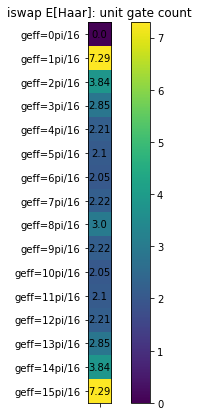

In [31]:
from src.utils.visualize import plotHamiltonianSweep
plotHamiltonianSweep(np.matrix(data), title="riswap E[Haar]: unit gate count", labels=labels, vmax=np.amax(data));

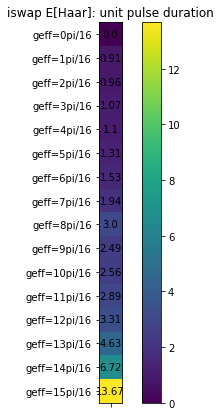

In [32]:
#apply cost function,
#for single gate basis we can just use multplication instead of recalcing

#here we are defining cost as pulse duration using speed limit
#using knowledge that power (g_total) and duration are inversely proportional
#we know that if we define a speed limit (maximum viable g_total)
#then the pulse duration of any gate becomes the ratio of its g_total/speed_limit
#in other words, if a gate has half power of speedlimit, we can reduce time by half

#NOTE suggestion from michael, says g actually proportional to current
# so square these terms to make proportional to power
# need to investigate further
# cost = (sum([i*np.pi/n_gc, j*np.pi/n_gg]))**2/(SPEED_LIMIT)**2 #current -> power
# cost = sum([i*np.pi/n_gc, j*np.pi/n_gg])/SPEED_LIMIT #linear power
n_geff = 16
cost_data = []
for i in range(0, n_geff):
    cost = sum([i*np.pi/n_geff])/SPEED_LIMIT
    u = h._construct_U_lambda(i*np.pi/n_geff)(1).full()
    u = CustomCostGate(u, f"iswap({i*np.pi/n_geff})", cost=1) #cost=cost
    cost_data.append([data[i][0] * cost])  

plotHamiltonianSweep(np.matrix(cost_data), title="riswap E[Haar]: unit pulse duration", labels=labels, vmax=np.amax(cost_data));